## Importando librerías a usar

In [3]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

# 1. Importar el Dataset

El dataset está disponible a través de la Universidad de California, en su repositorio de Machine Learning. Esta es la URL:

http:////archive.ics.uci.edu/ml/datasets/Heart+Disease

Este dataset contiene datos de pacientes sobre diagnosticos de enfermedades del corazón, que fue recolectado de muchas localizaciones alrrededor del mundo. Hay 76 atributos, incluidos edad, sexo, presión sanguinea en reposo, niveles de coleterol, datos del ecocardiograma, habitos de ejercicio, y muchos otros. Todos los estudios publicados usan esto datos enfocandose en un subconjunto de 14 atributos, así que haremos lo mismo. Mas especificamente, usaremos los datos extraidos de la Fundación Clinica de Cleveland (Cleveland Clinic Fundation).

Para importar los datos necesarios usaremos la función construida en pandas read_csv().

In [4]:
# Leer el csv
DATOS = pd.read_csv('datasets/supervised/heart.csv')

# Mostrar los datos
DATOS

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
# Eliminar datos perdidos (indicados con una '?')
DATOS = DATOS[ ~ DATOS.isin(['?'])]

# Quitar filas con values NaN del DataFrame
DATOS = DATOS.dropna(axis = 0)

# Mostrar datos pre-procesados
DATOS

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
# Mostrar la forma y los tipos de datos del DataFrame
print(DATOS.shape)
print(DATOS.dtypes)

(303, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [10]:
# Trasformar los datos a numéricos para habilitar un análisis mas extenso
DATOS = DATOS.apply(pd.to_numeric)
DATOS.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
# Mostrar las características de los datos, usando la función describe() construida en pandas
DATOS.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


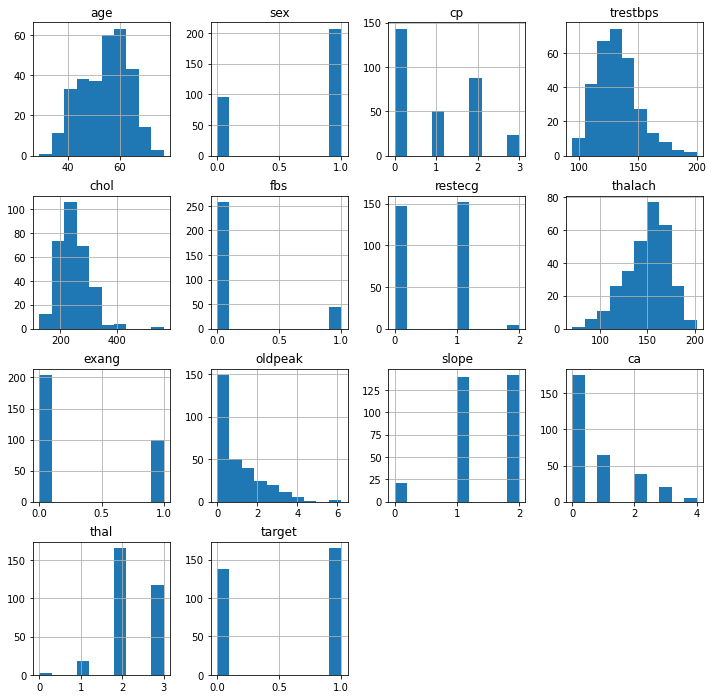

In [12]:
# Dibujar un histograma para cada variable
DATOS.hist(figsize = (12, 12))
plt.show()

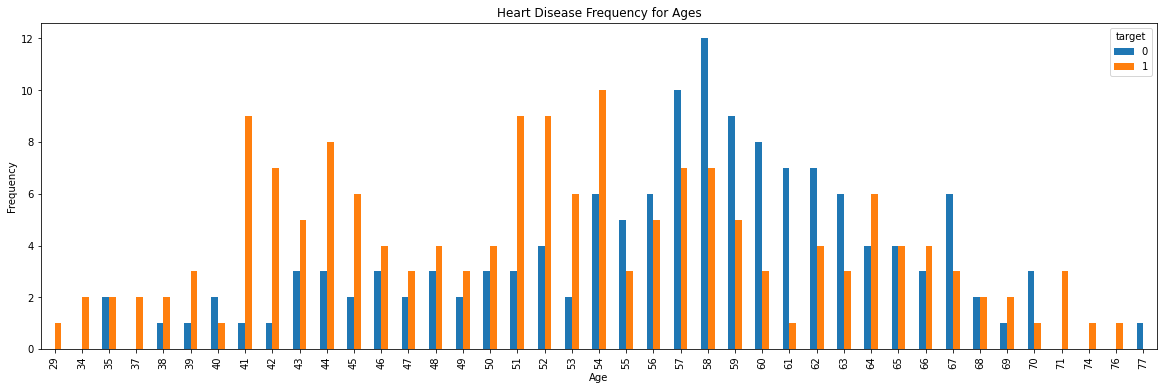

In [13]:
pd.crosstab(DATOS.age,DATOS.target).plot(kind = 'bar',figsize = (20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

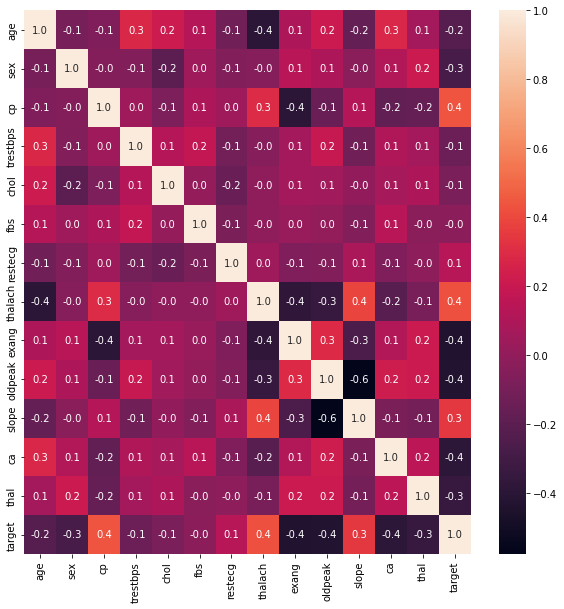

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(DATOS.corr(),annot=True,fmt='.1f')
plt.show()

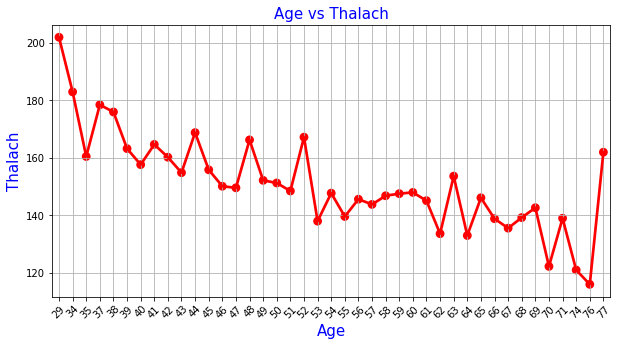

In [19]:
age_unique = sorted(DATOS.age.unique())
age_thalach_values = DATOS.groupby('age')['thalach'].count().values
mean_thalach = []
for i, age in enumerate(age_unique):
    mean_thalach.append(sum(DATOS[DATOS['age'] == age].thalach) / age_thalach_values[i])
    
plt.figure(figsize = (10, 5))
sns.pointplot(x = age_unique, y = mean_thalach, color = 'red', alpha = 0.8)
plt.xlabel('Age', fontsize = 15, color = 'blue')
plt.xticks(rotation = 45)
plt.ylabel('Thalach', fontsize = 15, color = 'blue')
plt.title('Age vs Thalach', fontsize = 15,color='blue')
plt.grid()
plt.show()

# 2. Crear los conjuntos de entremiento y de pruebas

Ahora que hemos pre-procesado los datos correctamente, podemos dividirlos en conjuntos de entrenamiento y de pruebas. Usaremos la funcion de Sklearn train_test_split() para generar el conjunto de entrenamiento (con el 80% del total de los datos) y el conjunto de pruebas (con el 20% del total de los datos).

In [22]:
X = np.array(DATOS.drop(['target'], 1))
y = np.array(DATOS['target'])

/tmp/ipykernel_12319/1899067287.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(DATOS.drop(['target'], 1))


In [23]:
X[0]

array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
         2.3,   0. ,   0. ,   1. ])

In [24]:
mean = X.mean(axis = 0)
X -= mean
std = X.std(axis = 0)
X /= std

In [25]:
X[0]

array([ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
       -2.27457861, -0.71442887, -2.14887271])

In [26]:
# Crear conjuntos X e Y para entrenamiento
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify = y, random_state = 42, test_size = 0.2)

In [27]:
# Convertir los datos a etiquetas categóricas
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes = None)
Y_test = to_categorical(y_test, num_classes = None)
print (Y_train.shape)
print (Y_train[:10])

(242, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [28]:
X_train[0]

array([ 1.61392956, -1.46841752,  1.97312292,  0.47839125, -0.14038081,
       -0.41763453,  0.89896224,  0.05917329, -0.69663055,  0.65599028,
        0.97635214,  1.24459328, -0.51292188])

# 3. Construir y entrenar la red neuronal

Con los datos divididos en conjuntos de entrenamiento y de pruebas, podemos empezar a construir la red neuronal para resolver el problema de clasificación. Usando Keras, definiremos un red neuronal simple con una capa oculta. Como este es un problema de clasificación categórica, usaremos una function de activacion softmax en la capa final de nuestra red neuronal y una perdida categorical_crossentropy durante la fase de entrenamiento.

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# Definir una función para construir el modelo de Keras
def create_model():
    # Crear el modelo
    model = Sequential()
    model.add(Dense(16, input_dim = 13, kernel_initializer = 'normal', kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer = 'normal', kernel_regularizer =r egularizers.l2(0.001), activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation = 'softmax'))
    
    # Compilar el modelo
    adam = Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                224       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
# Entrenar el modelo para el conjunto de entrenamiento
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test),epochs = 50, batch_size = 10)

Epoch 1/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2535 - accuracy: 0.9298 - val_loss: 0.6082 - val_accuracy: 0.7869
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2273 - accuracy: 0.9339 - val_loss: 0.6113 - val_accuracy: 0.7705
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.9380 - val_loss: 0.6244 - val_accuracy: 0.7705
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9504 - val_loss: 0.6328 - val_accuracy: 0.7705
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9380 - val_loss: 0.6457 - val_accuracy: 0.7541
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2152 - accuracy: 0.9256 - val_loss: 0.6240 - val_accuracy: 0.7869
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2596 - accuracy: 0.9091 - val_loss: 0.6197 - val_accuracy: 0.7869
Epoch 8/50
25/25 [==

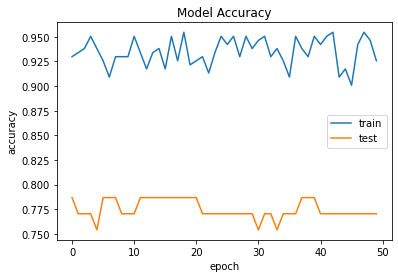

In [50]:
# Precisión del modelo
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

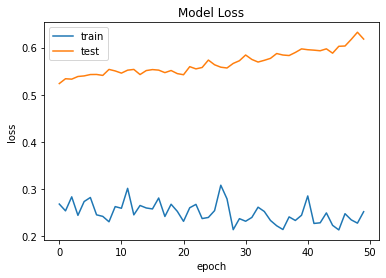

In [39]:
# Perdida del modelo
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# 4. Mejorar resultados - Un problema de clasificación binaria

A pesar de que hemos con seguido resultados prometedores, todavia tenemos una gran cantidad de error. Esto podría ser porque es muy dificil distinguir entre los varios diferentes niveles de enfermedad del conrazón (clases 1 - 4). Vamos a simplificar el problema convirtiendo los datos a un problema de clasificación binaria - enfermedad del corazón o no enfermedad del corazón.

In [40]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1]


In [41]:
# Definir un nuevo modelo de Keras para la clasificación binaria
def create_binary_model():
    # Crear el modelo
    model = Sequential()
    model.add(Dense(16, input_dim = 13, kernel_initializer = 'normal',  kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer = 'normal',  kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compilar el modelo
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                224       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
# Entrenar el modelo binario con los datos de entramiento
history = binary_model.fit(X_train, Y_train_binary, validation_data = (X_test, Y_test_binary), epochs = 50, batch_size = 10)

Epoch 1/50
25/25 [==============================] - 1s 6ms/step - loss: 0.6779 - accuracy: 0.6942 - val_loss: 0.6654 - val_accuracy: 0.7213
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.7479 - val_loss: 0.6349 - val_accuracy: 0.7213
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6110 - accuracy: 0.7893 - val_loss: 0.6037 - val_accuracy: 0.7541
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5732 - accuracy: 0.8306 - val_loss: 0.5682 - val_accuracy: 0.7869
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5373 - accuracy: 0.8347 - val_loss: 0.5360 - val_accuracy: 0.7705
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.8182 - val_loss: 0.5119 - val_accuracy: 0.7869
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.8512 - val_loss: 0.4876 - val_accuracy: 0.7869
Epoch 8/50
25/25 [==

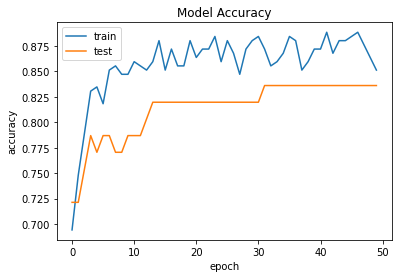

In [43]:
# Precisión del modelo
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

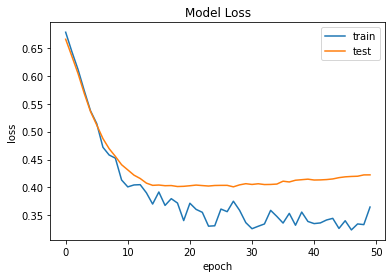

In [44]:
# Perdida del modelo
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# 5. Resultados y métricas

Los resultados de precisión que hemos visto son para el conjunto de entrenamiento pero, ¿Qué ocurre con el dataset de pruebas?, Si nuestro modelo no puede generalizar en datos que no han sido usandos para entrenarlo no hemos dado niinguna utilidad.

Vamos a probar el rendimiento de ambos modelos, cateorico y binario. Para hacer esto, haremos predicciones en el conjunto de pruebas y calcularemos las métricas de rendimiento usando Skalern.

In [46]:
# Generar el reporte de clasificación usando predicciones para el modelo categórico
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis = 1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.7540983606557377
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        28
           1       0.75      0.82      0.78        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



In [47]:
# Generar el reporte de clasificación usando predicciones para el modelo binario
from sklearn.metrics import classification_report, accuracy_score

binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model
0.8360655737704918
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



Como conclusión podemos ver que el rendimiento del modelo binario es mayor al del modelo categórico, aportando la utilidad de predicción de los mismos. El porqué tiene un mayor rendimiento el modelo binario se podría explicar, como ya se ha mencionado por la dificicultad de predecir el tipo de nivel de enfermedad del corazón en el modelo categórico.